# **STATISTICS FOR DATA SCIENCE ASSIGNMENT**

#### **Objective**: _Cleaning, analysing, visualising, forecasting and presentation of data_

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv('./data_w_genres.csv')

data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.00000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Weird Al"" Yankovic",0.176934,0.664788,218165.25760,0.685136,0.000046,0.162139,-9.877909,0.082392,132.495091,0.754409,33.681818,9,1,132,"['antiviral pop', 'comedy rock', 'comic', 'par..."
2,$IMEON,0.242300,0.806667,66307.33333,0.469000,0.000001,0.204333,-12.168000,0.482667,106.020000,0.592000,62.666667,6,0,6,[]
3,$NOT,0.547000,0.750125,152929.50000,0.519750,0.043137,0.213975,-8.878500,0.276725,114.229125,0.319500,64.625000,6,1,8,"['east coast hip hop', 'gangster rap', 'hardco..."
4,$pyda,0.000122,0.514000,331240.00000,0.899000,0.079300,0.367000,-5.115000,0.060200,174.028000,0.266000,58.000000,7,1,1,[]


In [8]:
len(data)
# Approx 22k songs data

22727


## Popularity Trends

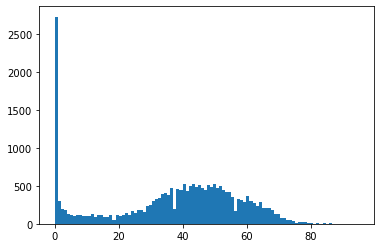

In [58]:
y = data['popularity']
freq, bin_edge, plot = plt.hist(y, bins = 100)

#### We can immediately see that popularity seems to be almost normally distributed but there is a spike at 0 which might be due to data not being available. Hence these rows should be dropped when analysing 

In [65]:
len(data[data['popularity']==0])

2387

In [69]:
data.drop(data[data['popularity']==0].index, inplace=True)

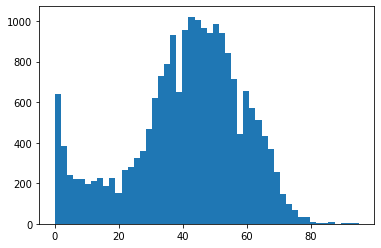

In [73]:
y = data['popularity']
freq, bin_edge, plot = plt.hist(y, bins = 50)

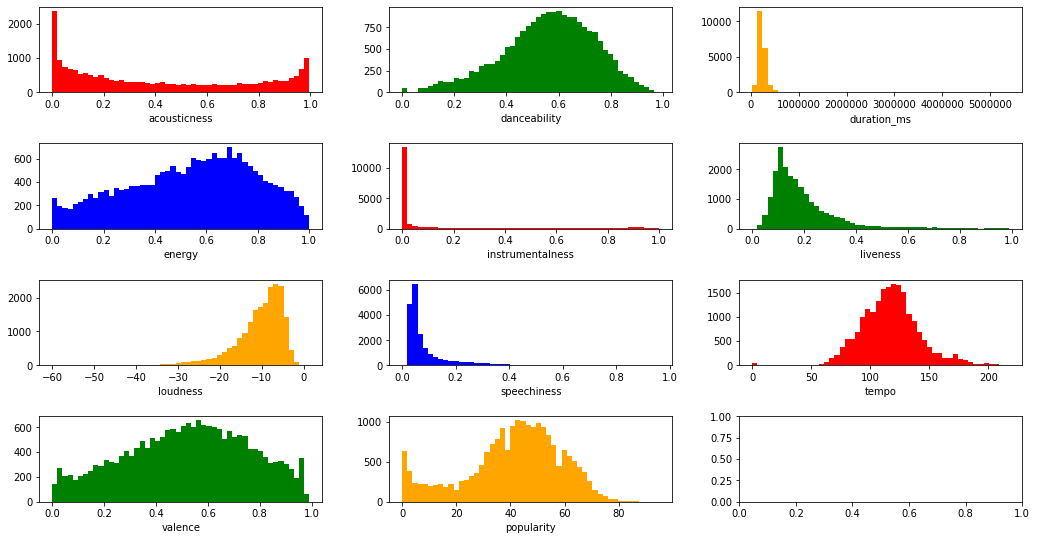

In [111]:
# similarly plotting the distribution of all continuous variables
fig, axs = plt.subplots(4, 3, figsize=(15, 8))
fig.tight_layout(pad=3.0)
axs = axs.reshape(12,)
i = 0
colors = ['red', 'green', 'orange', 'blue']
for feature in data.columns:
    subplot = axs[i]
    if(data[feature].dtype=='float64'):
        subplot.set(xlabel=feature)
        f, edge, plot = subplot.hist(data[feature], 50, color=colors[i%4])
        i = i+1;

#### We can observe that danceability, liveness, loudness, tempo, valence and popularity follow at least some type of distribution
#### There are potential outliers in duration, instrumentalness, tempo and speechiness